# Etape 3 : Les visualisations

In [16]:
#!pip install wordcloud

In [17]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


UsageError: Line magic function `%` not found.


# Cloud Words

In [19]:
Cloud = pd.read_csv("Tweets.csv")
Cloud

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-31 23:58:04+00:00,1609338127956545536,The Ultimate Art of War A Step by Step Illust...,mosciski52ejffd
1,1,2022-12-31 23:50:55+00:00,1609336328784576513,truckdriverpleb Unfortunately that is a fact ...,PeterRMacIsaac
2,2,2022-12-31 23:49:26+00:00,1609335954514366464,lexfridman I read most of those and would rec...,levosaurus
3,3,2022-12-31 23:48:15+00:00,1609335659277291523,lexfridman The art of war is going to change ...,BullstreetLLC
4,4,2022-12-31 23:47:13+00:00,1609335398509195268,coupusa EndWokeness The problem with that wh...,GigaChadwick
...,...,...,...,...,...
3136,3136,2022-12-14 03:35:23+00:00,1602869837004349443,Do you struggle picking out what to read next ...,nemo_nista
3137,3137,2022-12-14 03:11:12+00:00,1602863750653935617,At this weekend I plan to watch Crime Action ...,bingbingliucdc1
3138,3138,2022-12-14 03:06:28+00:00,1602862560570920960,she is ghariba Quran The book thief Tuesdays ...,__dontaskwhy__x
3139,3139,2022-12-14 02:00:54+00:00,1602846057746104324,r4hema six of crows the bell jar the book t...,c13ment1ne


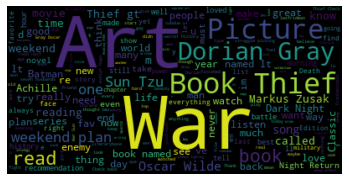

In [20]:
# Start with one review:
text = " ".join(i for i in Cloud['Text'])
# Stopword list
stopwords = set(STOPWORDS)
stopwords.update(['https','t','co','will','say','got','first','amp','don','go','s','de'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Frequencies

In [58]:
FreqWords = Cloud["Text"]

In [53]:
OneWord = FreqWords.str.split(expand=True).stack().value_counts().reset_index()
OneWord.columns = ['Word', 'Frequency'] 
OneWord

,Word,Frequency
0,of,3285
1,the,3122
2,The,2492
3,t,1618
4,I,1376
...,...,...
13721,vida,1
13722,tambi,1
13723,algunos,1
13724,quejaban,1


In [43]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]


In [56]:
TwoWords = get_ngrams(FreqWords, ngram_from=2, ngram_to=2, n=5)
TwoWords_df = pd.DataFrame(TwoWords)
TwoWords_df.columns=["TwoWords", "Frequency"]
TwoWords_df

,TwoWords,Frequency
0,art war,1025
1,book thief,1010
2,dorian gray,921
3,picture dorian,914
4,weekend plan,375


In [57]:
ThreeWords = get_ngrams(Freq2Words, ngram_from=3, ngram_to=3, n=5)
ThreeWords_df = pd.DataFrame(ThreeWords)
ThreeWords_df.columns=["ThreeWords", "Frequency"]
ThreeWords_df

,ThreeWords,Frequency
0,picture dorian gray,912
1,weekend plan watch,125
2,called weekend plan,125
3,lt book thief,125
4,book thief gt,125
